# <a> Catégorisez automatiquement des questions


Ce notebook regroupe les travaux d'analyse exploratoire de données issue de données importées via l'outil stackexchange explorer.

- Contexte

Afin de permettre de faciliter le parcours des utilisateurs de l'outil communautaire Stack Overflow nous avons travaillé sur la mise à disposition d'une API de suggestion de tags.

##I-Chargement et prétaitement des données.

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import sys
sys.path.append('/content/gdrive/My Drive/P5')
import contractions
import nlpk_module

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
from nlpk_module import normalize_corpus, remove_stopwords,tok
from wordcloud import WordCloud, STOPWORDS
import gc



In [4]:
def recap_cols(df, cols):
    """
    Fonction de dénombrement du contenu des listes des colonnes (cols) de df
    """

    print('='*50, '\nDénombrenent des mots')
    
    for col in cols:
        freq[col] = Counter(' '.join(df[col].values).split()).most_common(600)
        print('\t{:6s} : {:>7d} dont {:>6d} distincts'.\
                format(col, sum(dict(freq[col]).values()), len(freq[col])))
    print('='*50)
        
    return freq

In [5]:

path1 = "/content/gdrive/My Drive/P5/QueryResults.csv"
data=pd.read_csv(path1)



In [6]:
data.head(5)

,Title,Body,OwnerUserId,Tags,AcceptedAnswerId,Id,CreationDate,Score,ViewCount,FavoriteCount,AnswerCount,CommentCount
0,flutter - how to create forms in popup,<p>I want to create a form inside a pop-up wit...,10378771.0,<flutter><dart><popup><flutter-layout><flutter...,54481069.0,54480641,2019-02-01 13:35:58,43,106558,16,5,3
1,Spring MVC - AngularJS - File Upload - org.apa...,<p>I have a Java Spring MVC Web application as...,2353403.0,<java><spring><angularjs><spring-mvc><file-upl...,22090161.0,21015891,2014-01-09 09:13:07,20,55330,13,4,1
2,Abstraction VS Information Hiding VS Encapsula...,<p>Can you tell me what is the difference betw...,1556.0,<encapsulation><abstraction><glossary><ooad><i...,24748.0,24626,2008-08-23 21:41:49,180,156040,178,22,3
3,What Are Some Examples of Design Pattern Imple...,<p>I'm a moderately skilled programmer using J...,2628.0,<javascript><design-patterns><singleton><strat...,24701.0,24642,2008-08-23 21:56:15,19,7237,15,10,0
4,What's the best way to get to know linux or BS...,<p>I'd like to gain better knowledge of operat...,1534.0,<linux><operating-system><kernel><bsd><osdev>,24682.0,24648,2008-08-23 21:58:53,20,5607,11,12,0


In [7]:
data['CreationDate'] = pd.to_datetime(data['CreationDate'])
data['year']= data['CreationDate'].dt.year
data['CreationDate'].head(10)

0   2019-02-01 13:35:58
1   2014-01-09 09:13:07
2   2008-08-23 21:41:49
3   2008-08-23 21:56:15
4   2008-08-23 21:58:53
5   2008-08-24 06:48:23
6   2008-08-24 07:14:22
7   2008-08-24 18:21:11
8   2008-08-24 21:10:33
9   2008-08-25 14:45:27
Name: CreationDate, dtype: datetime64[ns]

In [8]:
data=data[data['year']==2012]

In [9]:
data_text= data[['Title',	'Body','Tags']]

In [10]:
data_text.head(5)

,Title,Body,Tags
3700,How to put a tkinter window on top of the others?,<p>I'm using Python 2 with <code>Tkinter</code...,<python><tkinter><osx-lion><pyobjc><py2app>
3701,-static option for gcc?,<p>I'm wondering what the -static option on gc...,<optimization><gcc><compiler-construction><sta...
3703,Javascript Redirect with Google Analytics,<p>I need help figuring out how to successfull...,<javascript><redirect><google-analytics><subdo...
3704,Remove unwanted White Space in WebView Android,<p>I have started developing an App using WebV...,<android><image><android-webview><padding><space>
3706,Changing a column type to longer strings in rails,"<p>At the first migration, I declared on a col...",<ruby-on-rails><string><postgresql><ruby-on-ra...


In [11]:
data_text.isna().sum()

Title    0
Body     0
Tags     0
dtype: int64

In [12]:
data_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3583 entries, 3700 to 25196
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   3583 non-null   object
 1   Body    3583 non-null   object
 2   Tags    3583 non-null   object
dtypes: object(3)
memory usage: 112.0+ KB


In [13]:
data_posts = pd.DataFrame()
data_posts["Tags"] = data_text["Tags"]
data_posts["Title"] = normalize_corpus(data_text["Title"])
data_posts["Body"] = normalize_corpus(data_text["Body"])
data_posts=data_posts[['Title','Body','Tags']]
data_posts.head()

,Title,Body,Tags
3700,put tkinter window top,I use python tkinter pyobjc I use pyapp progra...,<python><tkinter><osx-lion><pyobjc><py2app>
3701,static option gcc,I wonder static option gcc I need option compi...,<optimization><gcc><compiler-construction><sta...
3703,javascript redirect google analytic,I need help figure successfully redirect inclu...,<javascript><redirect><google-analytics><subdo...
3704,remove unwanted white space webview android,I start develop app use webview actually I loa...,<android><image><android-webview><padding><space>
3706,change column type long string rail,first migration I declare column content stre ...,<ruby-on-rails><string><postgresql><ruby-on-ra...


In [14]:
# Correction transform not saved
data_posts["Body"] = data_posts["Body"].str.lower()
data_posts["Body"] = data_posts["Body"].apply(remove_stopwords)

In [15]:
# Processing tags
data_posts["Tags"] = data_posts["Tags"].replace({"<" : " "},
                                     regex=True)
data_posts["Tags"] = data_posts["Tags"].replace({">" : ","},
                                     regex=True)
data_posts["Tags"] = data_posts["Tags"].str.rstrip(',')
data_posts.head()

,Title,Body,Tags
3700,put tkinter window top,use python tkinter pyobjc use pyapp program wo...,"python, tkinter, osx-lion, pyobjc, py2app"
3701,static option gcc,wonder static option gcc need option compile c...,"optimization, gcc, compiler-construction, sta..."
3703,javascript redirect google analytic,need help figure successfully redirect include...,"javascript, redirect, google-analytics, subdo..."
3704,remove unwanted white space webview android,start develop app use webview actually load im...,"android, image, android-webview, padding, space"
3706,change column type long string rail,first migration declare column content stre ac...,"ruby-on-rails, string, postgresql, ruby-on-ra..."


In [16]:
data_posts.isnull().mean()
data_posts.dropna(axis=0,
             inplace=True)

In [17]:
data_posts.shape

(3583, 3)

Avant d'effectuer certaines visualisations, certaines transformations vont etre réaliser sur des données textuelles avec Bag-of-Words et Tfidf.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#II-Exploration

**1-Title**

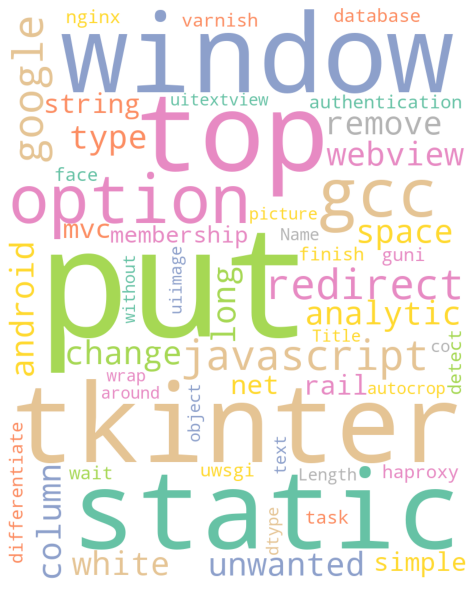

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 1000,
                max_words=1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 12,
                colormap="Set2").generate(str(data_posts["Title"]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer(max_features=1000)
bow_title = vectorizer.fit_transform(data_posts["Title"]).toarray()
df_title = pd.DataFrame(bow_title, columns=vectorizer.get_feature_names())
df_title = pd.DataFrame(df_title.sum(), columns=["Value"])
df_title.head()

,Value
abstract,6
access,58
account,8
across,6
action,11


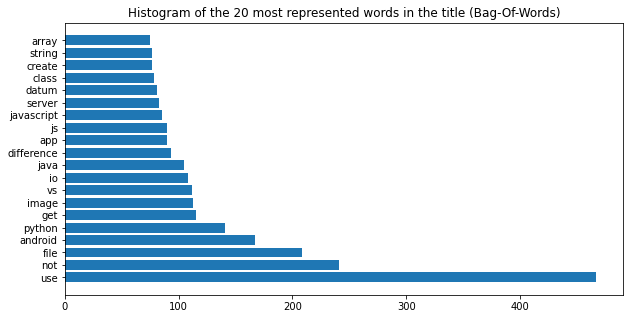

In [ ]:
top_20_title_word = df_title.sort_values("Value", ascending=False)[:20]

plt.figure(figsize=(10,5))
plt.barh(y=top_20_title_word.index, width=top_20_title_word.Value)
plt.title("Histogram of the 20 most represented words in the title (Bag-Of-Words)")
plt.show()

In [ ]:
vectorizer_tf = TfidfVectorizer(max_features=1000)
tfidf_title = vectorizer_tf.fit_transform(data_posts['Title']).toarray()
feature_names = vectorizer_tf.get_feature_names()
df_title_tf = pd.DataFrame(tfidf_title, columns=feature_names)
df_title_tf = pd.DataFrame(df_title_tf.sum(), columns=["Value"])

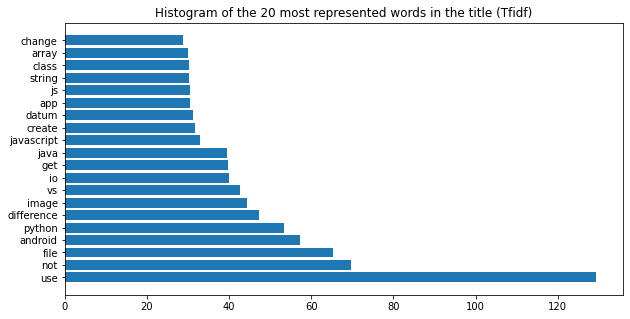

In [ ]:
top_20_title_word_tf = df_title_tf.sort_values("Value",ascending=False)[:20]

plt.figure(figsize=(10,5))
plt.barh(y=top_20_title_word_tf.index, width=top_20_title_word_tf.Value)
plt.title("Histogram of the 20 most represented words in the title (Tfidf)")
plt.show()

A l'intérieur des titres, certains mots semblent donner des indications concernant le contenu du corps. Parmi les mots les plus représentés "Python" et "Javascript" ou "Java" font référence au langage de programmation. L'évolution de la représentation dépend de la technologie dominante.


**2-Body**

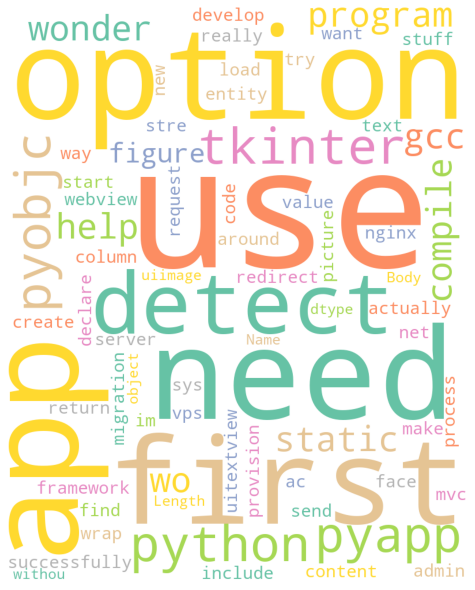

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 1000,
                max_words=1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 12,
                colormap="Set2").generate(str(data_posts["Body"]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
vectorizer = CountVectorizer(max_features=1000)
bow_body = vectorizer.fit_transform(data_posts["Body"]).toarray()
df_body = pd.DataFrame(bow_body, columns=vectorizer.get_feature_names())
df_body = pd.DataFrame(df_body.sum(), columns=["Value"])
df_body.head()

,Value
able,420
abstract,75
accept,132
access,460
accord,73


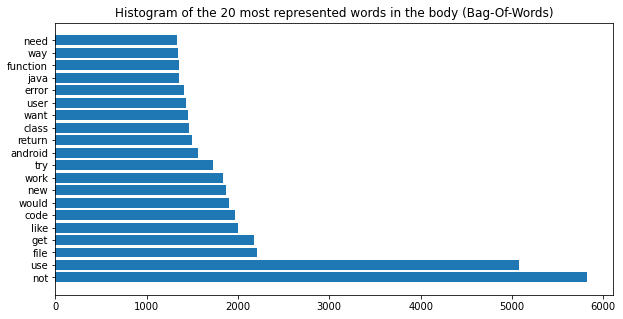

In [ ]:
top_20_body_word = df_body.sort_values("Value", ascending=False)[:20]

plt.figure(figsize=(10,5))
plt.barh(y=top_20_body_word.index, width=top_20_body_word.Value)
plt.title("Histogram of the 20 most represented words in the body (Bag-Of-Words)")
plt.show()

In [ ]:
vectorizer_tf = TfidfVectorizer(max_features=1000)
tfidf_body = vectorizer_tf.fit_transform(data_posts['Body']).toarray()
feature_names = vectorizer_tf.get_feature_names()
df_body_tf = pd.DataFrame(tfidf_body, columns=feature_names)
df_body_tf = pd.DataFrame(df_body_tf.sum(), columns=["Value"])

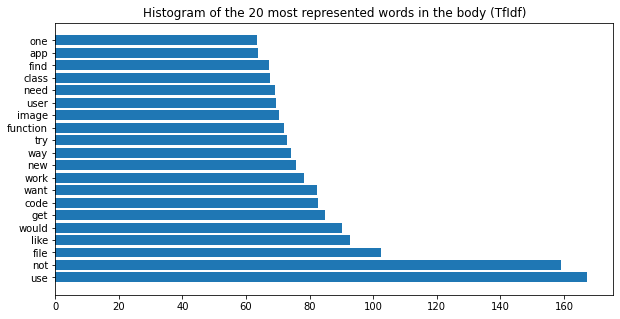

In [ ]:
top_20_body_word_tf = df_body_tf.sort_values("Value",ascending=False)[:20]

plt.figure(figsize=(10,5))
plt.barh(y=top_20_body_word_tf.index, width=top_20_body_word_tf.Value)
plt.title("Histogram of the 20 most represented words in the body (TfIdf)")
plt.show()

Concernant le corps des posts, hormis "Python" et "Javascript", les mots les plus représentés sont liés à des mots clés en lien avec le langage de programmation. Par exemple, "try" ou "return" sont des mots clés du langage Python. Il peut être intéressant de réaliser une analyse des parties du discours sur le corps. Cependant, des mots clés tels que "get" ou "like" peuvent être identifiés comme des verbes.


**3-Tags**

In [ ]:
freq = defaultdict()

data_posts.rename_axis(None, inplace=True)
dat_posts = data_posts.apply(lambda x: x.astype(str).str.lower())
cols = list(dat_posts.columns)
freq = recap_cols(data_posts, cols)

data_posts.head()

Dénombrenent des mots
	Title  :   11594 dont    300 distincts
	Body   :  185663 dont    300 distincts
	Tags   :    9764 dont    300 distincts


,Title,Body,Tags
3700,put tkinter window top,use python tkinter pyobjc use pyapp program wo...,"python, tkinter, osx-lion, pyobjc, py2app"
3701,static option gcc,wonder static option gcc need option compile c...,"optimization, gcc, compiler-construction, sta..."
3703,javascript redirect google analytic,need help figure successfully redirect include...,"javascript, redirect, google-analytics, subdo..."
3704,remove unwanted white space webview android,start develop app use webview actually load im...,"android, image, android-webview, padding, space"
3706,change column type long string rail,first migration declare column content stre ac...,"ruby-on-rails, string, postgresql, ruby-on-ra..."


In [ ]:
# Stopwords nltk 
import timeit
TOP = 50
train=dat_posts.copy()
train['Tags']=normalize_corpus(dat_posts['Tags'])
start_time = timeit.default_timer()
# Epurage et tri des tags
train['Tags'] = train['Tags'].apply(lambda x: ' '.join(sorted(x[1:-1].split('><'))))

# Ajout du nombre de Tags 
train['nTags'] = train['Tags'].apply(lambda x: len(x.split()))

# Etiquetage des tags
#train['Tags_lbl'] = lbl.fit_transform(train.Tags)

elapsed = timeit.default_timer() - start_time
print('-> OK en {:.3} sec'.format(elapsed))

freq = recap_cols(train, cols)

print('{} groupes de tags distincts'.format(len(train.Tags.value_counts())))
print('='*50)

train.head()

-> OK en 0.00784 sec
Dénombrenent des mots
	Title  :   11594 dont    300 distincts
	Body   :  185663 dont    300 distincts
	Tags   :   12985 dont    300 distincts
3561 groupes de tags distincts


,Title,Body,Tags,nTags
3700,put tkinter window top,use python tkinter pyobjc use pyapp program wo...,ython tkinter osx lion pyobjc pyap,6
3701,static option gcc,wonder static option gcc need option compile c...,ptimization gcc compiler construction static o...,6
3703,javascript redirect google analytic,need help figure successfully redirect include...,avascript redirect google analytic subdomain s...,6
3704,remove unwanted white space webview android,start develop app use webview actually load im...,ndroid image android webview padding spac,6
3706,change column type long string rail,first migration declare column content stre ac...,uby rail string postgresql ruby rails rail act...,8


Text(0.5, 1.0, 'Distribution du nombre de tags par question')

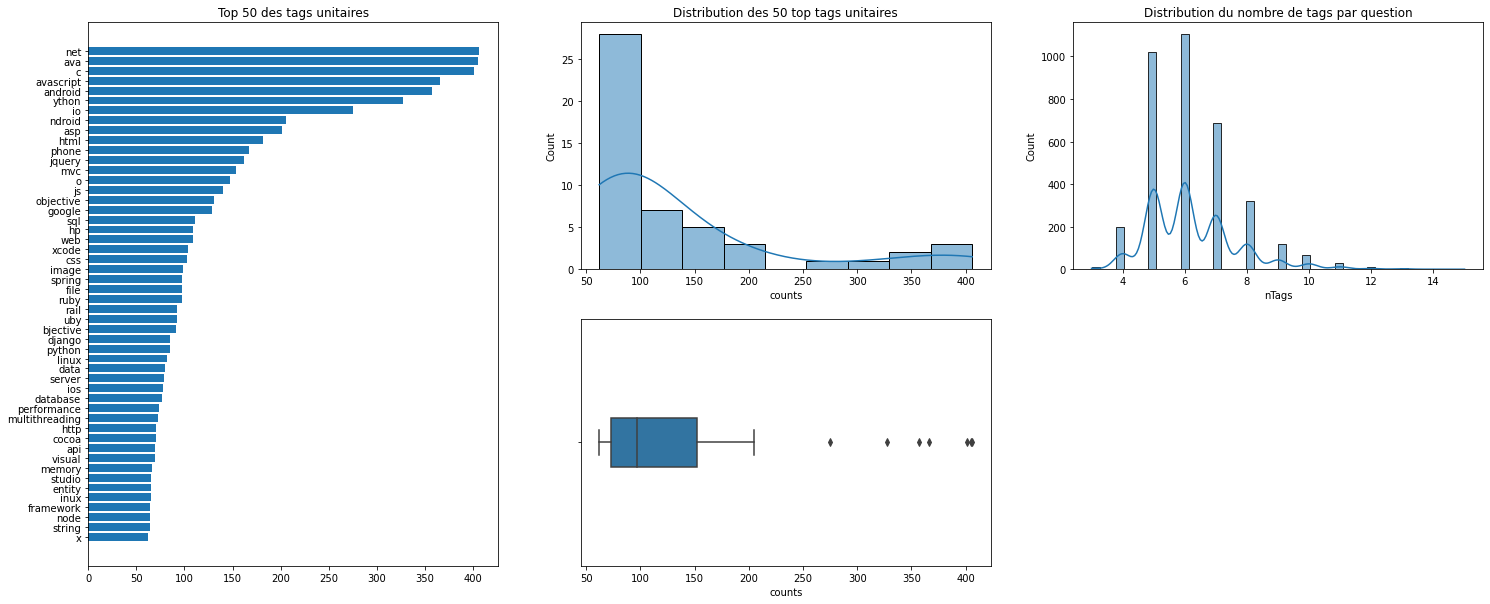

In [ ]:
fig = plt.figure(figsize=(25, 10))
plt.subplot(131)
plt.barh([k for k, v in sorted(freq['Tags'][:TOP], key=lambda x: x[1])], 
         [v for k, v in sorted(freq['Tags'][:TOP], key=lambda x: x[1])])
plt.title('Top {} des tags unitaires'.format(TOP))

temp = pd.DataFrame.from_dict(dict(freq['Tags'][:TOP]), orient='index')\
                              .rename(columns={0:'counts'})
plt.subplot(232)
plt.title('Distribution des {} top tags unitaires'.format(TOP))
sns.histplot(temp.counts, kde=True)

plt.subplot(235)
sns.boxplot(x=temp.counts, width=0.2)

plt.subplot(233)
sns.histplot(train['nTags'], kde=True)
plt.title('Distribution du nombre de tags par question')

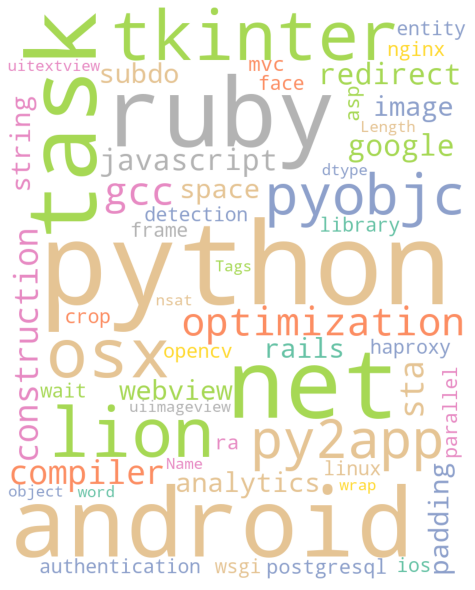

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, 
                height = 1000,
                background_color ='white',
                max_words = 1000, 
                stopwords = stopwords,
                min_font_size = 12,
                colormap="Set2"
                ).generate(str(data_posts["Tags"]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [19]:
vectorizer = CountVectorizer(max_features=12000)
bow_tags = vectorizer.fit_transform(data_posts["Tags"]).toarray()
df_tags = pd.DataFrame(bow_tags, columns=vectorizer.get_feature_names())
df_tags = pd.DataFrame(df_tags.sum(), columns=["Value"])

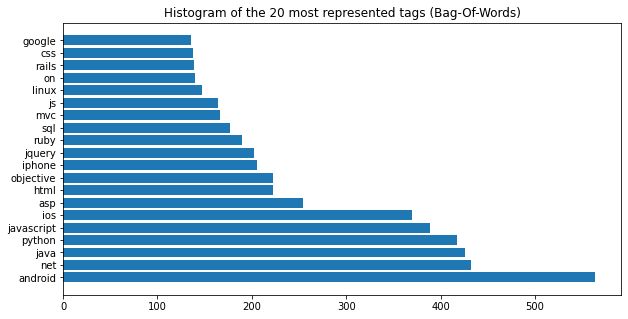

In [20]:
top_20_tags_word = df_tags.sort_values("Value", ascending=False)[:20]

plt.figure(figsize=(10,5))
plt.barh(y=top_20_tags_word.index, width=top_20_tags_word.Value)
plt.title("Histogram of the 20 most represented tags (Bag-Of-Words)")
plt.show()

In [129]:
tags_more_frequent = df_tags.loc[df_tags["Value"] <= 100].sort_values("Value", ascending=False).index.tolist()

In [ ]:
vectorizer_tf = TfidfVectorizer(max_features=1000)
tfidf_tags = vectorizer_tf.fit_transform(data_posts['Tags']).toarray()
feature_names = vectorizer_tf.get_feature_names()
df_tags_tf = pd.DataFrame(tfidf_tags, columns=feature_names)
df_tags_tf = pd.DataFrame(df_tags_tf.sum(), columns=["Value"])

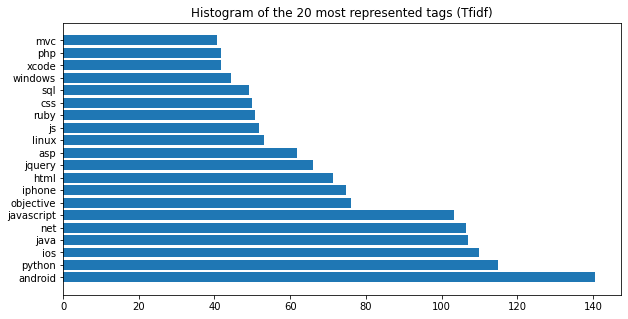

In [ ]:
top_20_tags_word_tf = df_tags_tf.sort_values("Value",ascending=False)[:20]

plt.figure(figsize=(10,5))
plt.barh(y=top_20_tags_word_tf.index, width=top_20_tags_word_tf.Value)
plt.title("Histogram of the 20 most represented tags (Tfidf)")
plt.show()

Les langages de programmation tels que Python, Javascript (abrégé js), HTML, PHP ou Ruby sont les balises les plus représentées. Ce résultat est conforme aux mots les plus représentés dans le titre des articles.

- Data_posts selection

Afin d'obtenir la meilleure catégorisation, les balises avec une fréquence sur 100 et moins ont été conservées.

In [ ]:
print(tags_more_frequent)

['android', 'net', 'java', 'python', 'javascript', 'ios', 'asp', 'objective', 'html', 'iphone', 'jquery', 'ruby', 'sql', 'mvc', 'js', 'linux', 'on', 'rails', 'css', 'google', 'windows', 'php', 'web', 'image', 'spring', 'data', 'xcode', 'api', 'node', 'django', 'file', 'database', 'performance', 'git', 'server', 'multithreading', 'http', 'visual', 'string', 'memory', 'algorithm', 'cocoa', '11', 'entity', 'framework', 'postgresql', 'studio', 'bash', 'json', 'touch', 'amazon', 'arrays', 'processing', 'mysql', 'design', 'optimization', 'chrome', 'testing', 'shell', 'macos', 'authentication', 'jpa', 'ipad']


In [130]:
len(list(set(tags_more_frequent)))

3619

In [23]:
print("Number of tags keept:", len(tags_more_frequent))

Number of tags keept: 29


In [131]:
data_tag=data_posts['Tags'].apply(lambda x:x.strip().split(','))

In [132]:
df_more_frequent=data_posts[data_tag.apply(lambda x : any(pd.Series(tags_more_frequent).isin(x)))]

In [ ]:
df_more_frequent.to_csv("data_with_tags_more_frequent.csv", index=False)

**References:**


- https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72
- https://www.analyticsvidhya.com/blog/2021/09/essential-text-pre-processing-techniques-for-nlp/